# Lab 1
## Question 3: Working on Natural Signal

### Question 3.1: Plotting an EEG Signal

In [1]:
from scipy import io
from matplotlib import pyplot as plt
import numpy as np

Sampling frequency: 1000 Hz


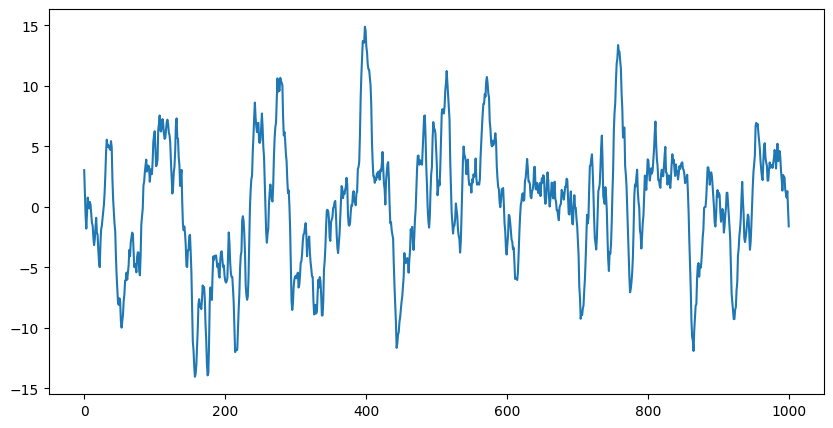

In [2]:
# Load the EEG data
EEG_data = io.loadmat('EEG_exp.mat')
EEG = EEG_data['EEG'][0]
sampling_freq = EEG_data['fs'][0][0]

# Plotting the EEG data of the first 1000 samples
plt.figure(figsize=(10, 5))
print(f"Sampling frequency: {sampling_freq} Hz")
plt.plot(EEG[0:1000])

### Question 3.2: Analog to Discrete Time Conversion

In [3]:
min_v, max_v = -32, 32
delta_v = (max_v - min_v) / 16  # Voltage resolution for 4-bit ADC

In [4]:
# Create the digitisation vector with new possible values that your signal can take
ADC_levels = np.arange(min_v, max_v, delta_v) + delta_v / 2

# Digitize the EEG signal with our ADC with the function np.digitize
# note that we have to scale the redigitized signal to its original units
EEG_quant = np.digitize(EEG, bins=ADC_levels) * delta_v + min_v


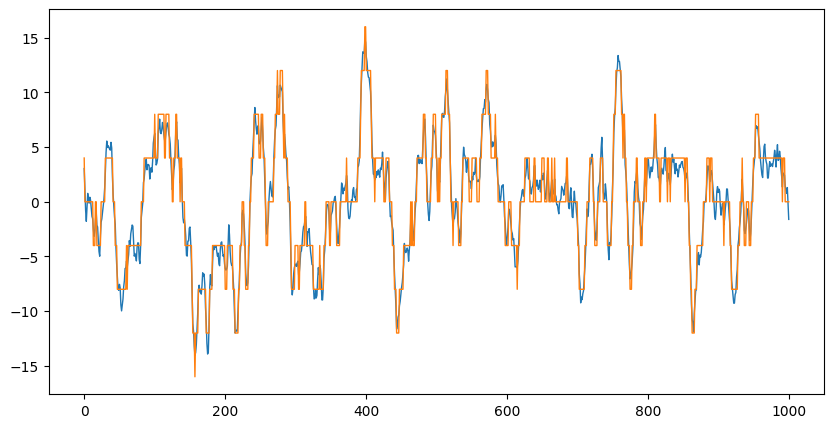

In [5]:
# Plot the EEG Signal and the digitized signal over it for the first 1000 samples
plt.figure(figsize=(10, 5))
plt.plot(EEG[0:1000], linewidth=1)
plt.plot(EEG_quant[0:1000], 'tab:orange', linewidth=1)

### Question 3.3: Down-sampling in time

Sampling Period (dt): 0.001 s
Total Duration (T_exp): 720.0 s
Down sampling rate (d_rate): 20


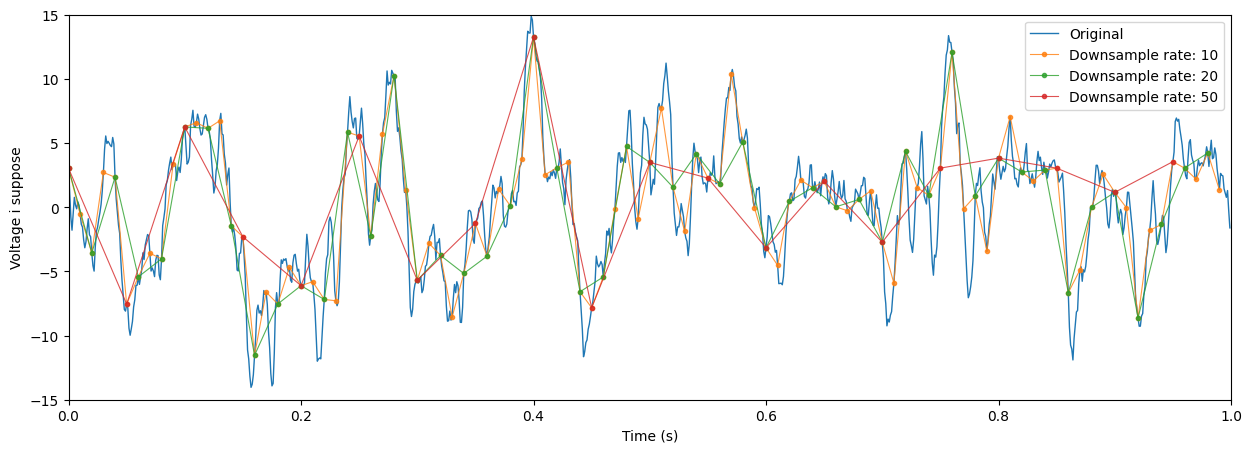

In [22]:
dt = 1 / sampling_freq  # Sampling Period
T_exp = dt * 720000  # Total duration of the signal
t_EEG = np.arange(0, T_exp, dt)  # EEG time vector
d_rates = [10, 20, 50]
d_rate = 20  # Down sampling rate

print(f"Sampling Period (dt): {dt} s")
print(f"Total Duration (T_exp): {T_exp} s")
print(f"Down sampling rate (d_rate): {d_rate}")

# Plotting the signal and its downsampled version
plt.figure(figsize=(15, 5))
plt.xlabel("Time (s)")
plt.ylabel("Voltage i suppose")

plt.plot(t_EEG[0:1000], EEG[0:1000], linewidth=1, label="Original")
for dr in d_rates:
    plt.plot(t_EEG[0:1000:dr],
            EEG[0:1000:dr],
            '.-',
            label=f'Downsample rate: {dr}',
            linewidth=0.8,
            alpha=0.8)

plt.xlim([0, 1])
plt.ylim([-15, 15])
plt.legend()